# О новом пакете для численного решения обыкновенных дифференциальных уравнений в  Sage

Малых М.Д., Баддур Али, Гонсалес Ананина Луис Антонио, РУДН

В сообщении будет представлен пакет для численного интегрирования дифференциальных уравнений в системе компьютерной алгебры [Sage](https://github.com/malykhmd/fdm), ориентированный на комфортное проведение компьютерных экспериментов со схемами высокого порядка. При его создании мы держались следующих общих принципов. 
* Действия, которые могут быть выполнены аналитически, выполняются аналитически. 
* Реализации методов не зависят от поля ($\mathbb{R}, \mathbb{C}$) и тем более от числа бит, отведенных на одно число. 
* Численные решения рассматриваются как элементы нового класса, в определении которого предусмотрены инструменты для интерполяции и визуализации.
* Метод Ричардсона получения апостериорных оценок ошибок «локализован» и  отделен от реализации численных методов, для чего к численным решениям добавлены дополнительные атрибуты. 
* Реализация метода Рунге-Кутты поддерживает работу с  таблицами Бутчера любого размера, встроен инструментарий для исследования и визуализации таблиц Бутчера.  
Наша цель --- создать удобную среду для численных экспериментов с ОДУ. 

Пакет доступен для всех желающих на [github.com/malykhmd/fdm](https://github.com/malykhmd/fdm).

Отказ от ответственности: мы не ставили цели создания автомата для интегрирования ОДУ. Здесь можно попробовать разное, в т.ч. давно обруганное. Несколько ссылок: 
* [scipy.integrate.ode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
* [NodePy](https://github.com/ketch/nodepy) by D. I. Ketcheson  "представляет объектно-ориентированный подход, в котором базовым объектом является числовой решатель ОДУ. Идея состоит в том, чтобы разработать лабораторию для таких методов в том же смысле, что MATLAB является лабораторией для матриц".

## Начало работы

In [1]:
load("fdm.sage")

### Постановка начальной задачи

In [2]:
var("t,x1,x2")
pr1=Initial_problem([x1,x2],[x2,-x1],[0,1],10)

In [3]:
pr1.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = x_{2} , \quad  \frac{d}{dt} x_{2} = -x_{1} , \\ &
x_{1} (0)= 0 , \quad x_{2} (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = x_{2} , \quad  \frac{d}{dt} x_{2} = -x_{1} , \\ &
x_{1} (0)= 0 , \quad x_{2} (0)= 1
\end{aligned} \right.$$
### Численное решение и  его визуализация

In [4]:
s1=erk(pr1,N=20)

In [5]:
s1.list()

[[0, 0, 1],
 [1/2, 0.479166666666667, 0.877604166666667],
 [1, 0.841037326388889, 0.540588378906250],
 [3/2, 0.997129793520327, 0.0714255615516945],
 [2, 0.909310009744432, -0.415107988970883],
 [5/2, 0.599108341961540, -0.800011547073341],
 [3, 0.142441110884229, -0.989166214282915],
 [7/2, -0.348968565260602, -0.936349423479272],
 [4, -0.754923698992210, -0.654530051313969],
 [9/2, -0.976153166672253, -0.212684027807919],
 [5, -0.958587183034391, 0.281087670042776],
 [11/2, -0.706572264048748, 0.706006735632144],
 [6, -0.281795868823212, 0.958160329408860],
 [13/2, 0.211813262546374, 0.975912684568377],
 [7, 0.653513029788306, 0.754971183309922],
 [15/2, 0.935282783249179, 0.349424196079155],
 [8, 0.988240494879005, -0.141500203227015],
 [17/2, 0.799481795261599, -0.597713071732398],
 [9, 0.415224374490619, -0.907640509119668],
 [19/2, -0.0705084361319803, -0.995510772082297],
 [10, -0.538894075624010, -0.839879109227733]]

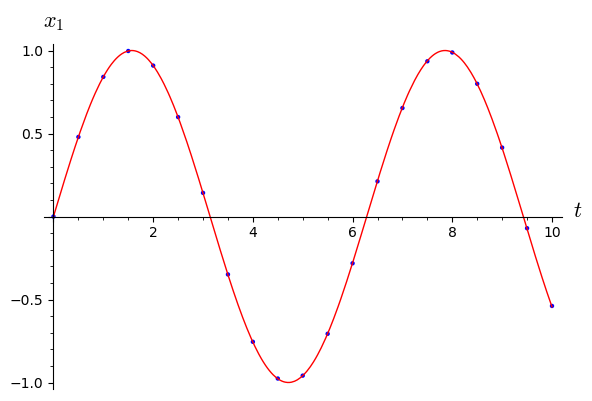

In [6]:
s1.plot(t,x1)+plot(sin,(0,10),color="red")

Поддерживается большинство опций функции стандартных функций point/line, кроме тех, к которым можно обратиться через метод show.

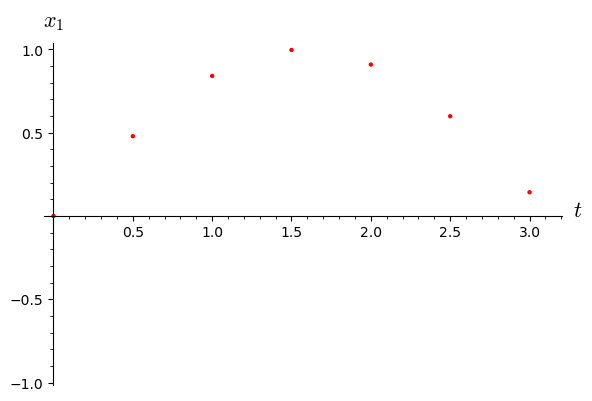

In [12]:
s1.plot(t,x1, color='red').show(xmin=0,xmax=pi)

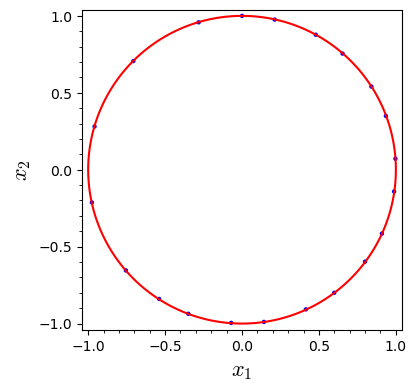

In [7]:
s1.plot(x1,x2)+implicit_plot(x1^2+x2^2-1,(x1,-1,1),(x2,-1,1), color="red")

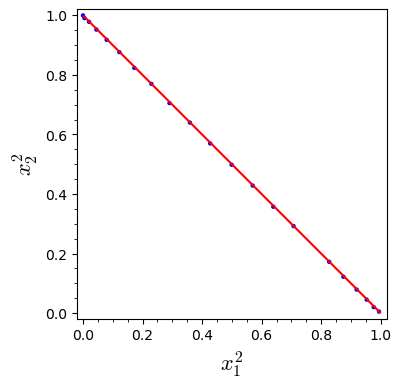

In [8]:
s1.plot(x1^2,x2^2)+implicit_plot(x1+x2-1,(x1,0,1),(x2,0,1), color="red")

Интерполяция: по формуле Тейлора или сплайнами

In [14]:
s1.value(x1,9.12)

0.303582697696811

In [15]:
s1.value(x1,9.12)-sin(9.12)

0.00350132133172604

In [16]:
s1.spline(x1,9.12)

[[17/2, 0.799481795261599], [9, 0.415224374490619], [19/2, -0.0705084361319803], [10, -0.538894075624010]]

In [20]:
f=s1.spline(x1,9.12)
f(9.12)

0.30513034311361786

In [21]:
f(9.12)-sin(9.12)

0.00504896674853289

Отыскание нулей

In [12]:
s1.zeros(x1)

[3.1430180411731743, 6.286036263964258, 9.429057230259955]

In [13]:
[pi.n()*i for i in [1,2,3]]

[3.14159265358979, 6.28318530717959, 9.42477796076938]

## Оценки по Ричадсону

Пусть $u(t,x_1, \dots x_n)$ --- заданное символьное выражение и $t=a$ --- заданный момент времени. Пусть $b$ --- точное знаение $u$ в этот момент времени, а $b_h$ --- приближенное. Тогда 
$$
E=b_h - b = ch^r + O(h^{r+1}).
$$
Если порядок интеполяции по численному решению выше порядка аппроксимации разностной схемы, то $r$ равен порядку аппроксимации. 
Если известно два приближенных занчения, то из системы 
$$
b_{h_1} - b = ch_1^r, \quad b_{h_2} - b = ch_2^r
$$
можно найти ошибку по формуле
$$
E=ch_2^r= \frac{b_{h_2}-b_{h_1}}{1-\left(\frac{h_1}{h_2}\right)^r}
$$
См.: Baddour A., Malykh M.D. Richardson-Kalitkin method in abstract description // Discrete and Continuous Models and Applied Computational Science. - 2021. - Vol. 29. - N. 3. - P. 271-284. doi: [10.22363/2658-4670-2021-29-3-271-284](https://doi.org/10.22363/2658-4670-2021-29-3-271-284).

In [22]:
p1=erk(pr1,N=40)
p2=erk(pr1,N=91)
richardson(p1,p2,x1^2,9.1)

[0.101830233518802, 5.99027198908311e-6]

In [23]:
p2.value(x1^2,9.1)-sin(9.1)^2

6.46866476373964e-6

## Диаграмма Ричардсона
$$\ln E= r \ln h +a$$
График зависимости ошибки от шага в двойном логарифмическом масшатбе должен быть линейным. Это -- проверяемое условие применимости метода Ричардсона.  

In [26]:
L=[erk(pr1,N=2^n, field=RealField(40)) for n in range(15)]

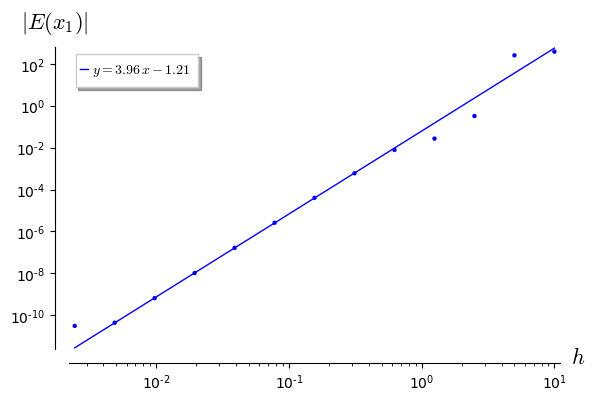

In [27]:
richardson_plot(L[:-1],x1,9.1, nmin=5, nmax=len(L)-3)

На диаграмме Ричардсона есть 
* участок, где $h$ велико и заметен вклад следующих членов ряда по степеням $h$, 
* линейный участок, где применим метод Ричадрсона
* участок, где $h$ мало, здесь мы вышли на ошибку округления. 

In [29]:
L2=[erk(pr1,N=2^n, field=RealField(20)) for n in range(15)]

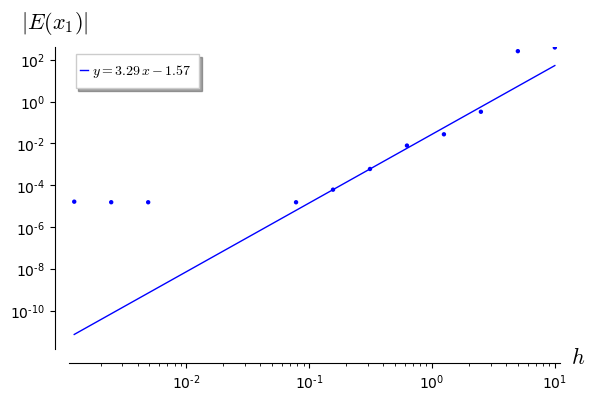

In [34]:
richardson_plot(L2,x1,9.1, nmin=5, nmax=7)

В особых случаях порядок может быть выше порядка аппроксимации:
$$
E=b_h - b = 0 h^r + c_1 h^{r+1} + O(h^{r+2})  
$$

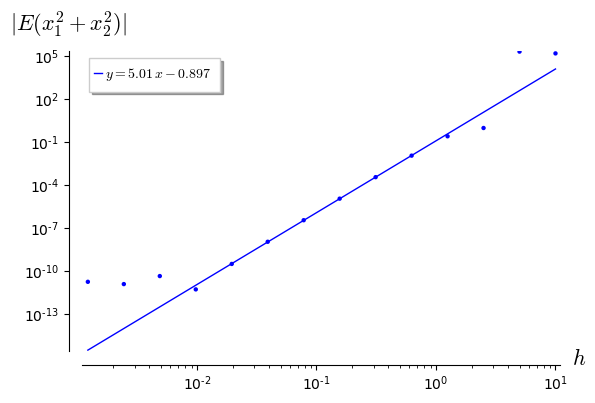

In [22]:
richardson_plot(L,x1^2+x2^2,9.1, nmin=4, nmax=len(L)-5)

In [23]:
richardson(L[-5],L[-6],x1^2+x2^2-1,pi.n(),delta=1)

[-5.4569682106e-12, -3.5499631908e-12]

Вопрос. Может ли случиться, что эфективный порядок $r$ имеет дробное значение? Что использовать лучше: 5 или 5.01?

Метод Ричадсона применим и к вычислению нулей.

In [24]:
L=[erk(pr1, N=2^n*10) for n in range(10)]

In [25]:
L[-1].zeros(x1)

[3.141592653590175, 6.28318530718035, 9.424777960770523]

In [26]:
[pi.n()*i for i in [1,2,3]]

[3.14159265358979, 6.28318530717959, 9.42477796076938]

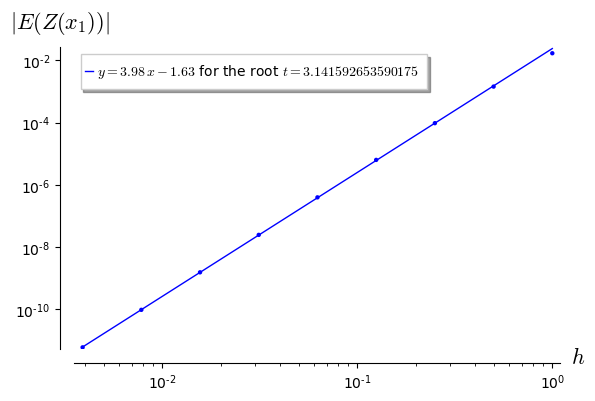

In [27]:
richardson_plot_zeros(L, x1, num=0, nmin=1)

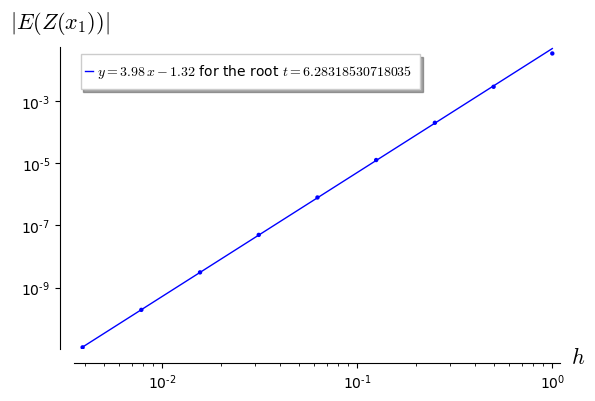

In [28]:
richardson_plot_zeros(L, x1, num=1, nmin=1)

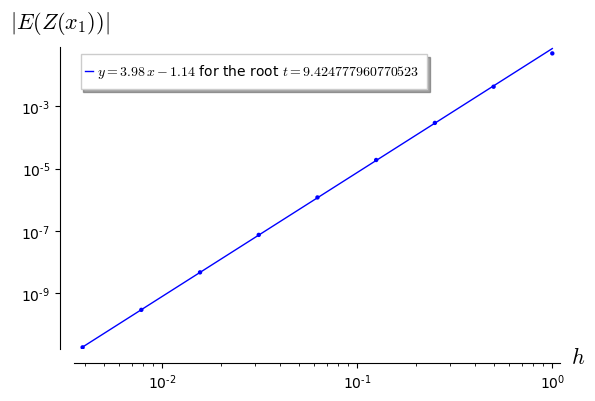

In [29]:
richardson_plot_zeros(L, x1, num=2, nmin=1)

In [30]:
richardson_zeros(L[-1],L[-2], x1)

[3.141592653590175, 3.80702876630797e-13]

In [31]:
L[-1].zeros(x1)[0]-RR(pi)

3.81916720471054e-13

## Явный метод Рунге-Кутты

### Пример работы с таблицой Бутчера 6-го порядка

Таблицы Бутчера для явного метода собраны на сайте [П. Стоуна](http://www.peterstone.name/Maplepgs/RKcoeff.html). Мы собрали их в коллекцию "butchers_list.sage", которую мы намерены расширять и тестировать.

In [35]:
load("butchers_list.sage")
B=butchers_list[7]

In [36]:
B.latex()

\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  &  &  &  & \\
\frac{2}{3} & \frac{2}{9} & \frac{4}{9} &  &  &  &  & \\
\frac{1}{3} & \frac{7}{36} & \frac{2}{9} & -\frac{1}{12} &  &  &  & \\
\frac{5}{6} & -\frac{35}{144} & -\frac{55}{36} & \frac{35}{48} & \frac{15}{8} &  &  & \\
\frac{1}{6} & -\frac{1}{360} & -\frac{11}{36} & -\frac{1}{8} & \frac{1}{2} & \frac{1}{10} &  & \\
1 & -\frac{41}{260} & \frac{22}{13} & \frac{43}{156} & -\frac{118}{39} & \frac{32}{195} & \frac{80}{39} & \\
\hline
 & \frac{13}{200} &  & \frac{11}{40} & \frac{11}{40} & \frac{4}{25} & \frac{4}{25} & \frac{13}{200}
\end{array}


$$\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  &  &  &  & \\
\frac{2}{3} & \frac{2}{9} & \frac{4}{9} &  &  &  &  & \\
\frac{1}{3} & \frac{7}{36} & \frac{2}{9} & -\frac{1}{12} &  &  &  & \\
\frac{5}{6} & -\frac{35}{144} & -\frac{55}{36} & \frac{35}{48} & \frac{15}{8} &  &  & \\
\frac{1}{6} & -\frac{1}{360} & -\frac{11}{36} & -\frac{1}{8} & \frac{1}{2} & \frac{1}{10} &  & \\
1 & -\frac{41}{260} & \frac{22}{13} & \frac{43}{156} & -\frac{118}{39} & \frac{32}{195} & \frac{80}{39} & \\
\hline
 & \frac{13}{200} &  & \frac{11}{40} & \frac{11}{40} & \frac{4}{25} & \frac{4}{25} & \frac{13}{200}
\end{array}$$

In [37]:
B.latex(field=RealField(11))

\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
0.500 & 0.500 &  &  &  &  &  & \\
0.667 & 0.222 & 0.444 &  &  &  &  & \\
0.333 & 0.194 & 0.222 & -0.0833 &  &  &  & \\
0.834 & -0.243 & -1.53 & 0.729 & 1.88 &  &  & \\
0.167 & -0.00278 & -0.306 & -0.125 & 0.500 & 0.100 &  & \\
1.00 & -0.158 & 1.69 & 0.276 & -3.03 & 0.164 & 2.05 & \\
\hline
 & 0.0650 &  & 0.275 & 0.275 & 0.160 & 0.160 & 0.0650
\end{array}


$$\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
0.500 & 0.500 &  &  &  &  &  & \\
0.667 & 0.222 & 0.444 &  &  &  &  & \\
0.333 & 0.194 & 0.222 & -0.0833 &  &  &  & \\
0.834 & -0.243 & -1.53 & 0.729 & 1.88 &  &  & \\
0.167 & -0.00278 & -0.306 & -0.125 & 0.500 & 0.100 &  & \\
1.00 & -0.158 & 1.69 & 0.276 & -3.03 & 0.164 & 2.05 & \\
\hline
 & 0.0650 &  & 0.275 & 0.275 & 0.160 & 0.160 & 0.0650
\end{array}$$

In [38]:
B.order()

6

In [39]:
s1=erk(pr1,N=10)
s2=erk(pr1,N=10, tableau=B)

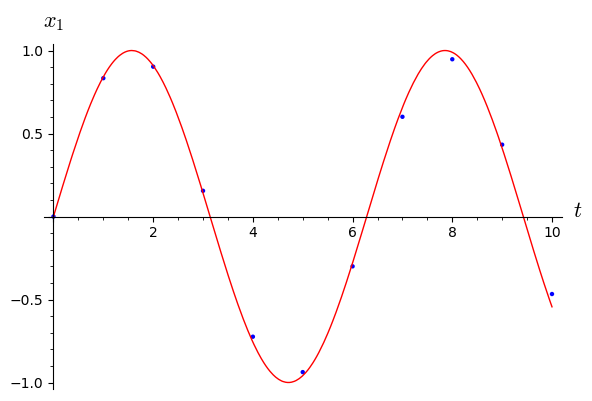

In [40]:
s1.plot(t,x1)+plot(sin,(0,10),color="red")

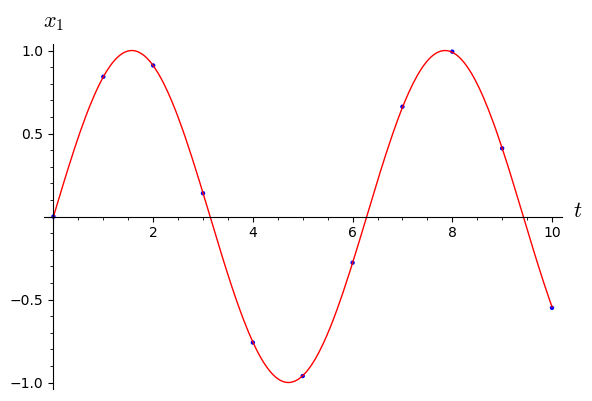

In [41]:
s2.plot(t,x1)+plot(sin,(0,10),color="red")

In [12]:
@parallel
def fu(n):
    return erk(pr1,N=2^n)
L=fu([n for n in range(15)])
L1=list(L)

In [13]:
@parallel
def fu(n):
    return erk(pr1,N=2^n, tableau=B)
L=fu([n for n in range(15)])
L2=list(L)

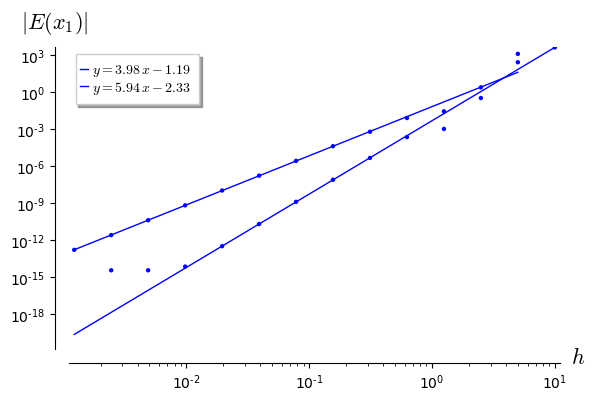

In [15]:
richardson_plot([L1[n][1] for n in range(1,15)],x1,9.1, nmin=4) +\
richardson_plot([L2[n][1] for n in range(15)],x1,9.1, nmin=5, nmax=10)

Из-за высокого порядка мы быстро выходим на ошибку округления. Ее можно убрать, используя опцию field. Только и 9.1 нужно указывать как элемент поля RealField(300).

In [16]:
@parallel
def fu(n):
    return erk(pr1,N=2^n, tableau=B, field=RealField(300))
L=fu([n for n in range(15)])
L3=list(L)

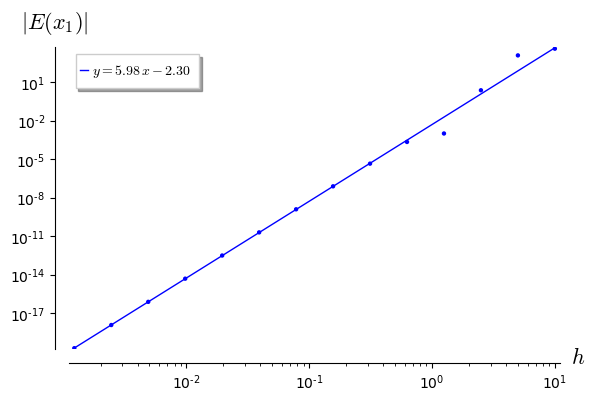

In [17]:
richardson_plot([L3[n][1] for n in range(len(L3))],x1,RealField(300)(9.1), nmin=5)

### Констурирование явных таблиц Бутчера

Таблица с s стадиями имеет порядок n, если ее коэффциенты удовлетворяют системе уравнений, которые возвращает функция butcher_eqs(n,s), опция implicit указывает на то, является ли таблица явной или нет. По умолчанию является. 

См.: Ying Y. The symbolic problems associated with Runge-Kutta methods and their solving in Sage // Discrete and Continuous Models and Applied Computational Science. - 2019. - Vol. 27. - N. 1. - P. 33-41. doi: [10.22363/2658-4670-2019-27-1-33-41](https://doi.org/10.22363/2658-4670-2019-27-1-33-41)

#### 2-порядок

В нашу коллекцию входит лишь одна таблица 2-го порядка.

In [42]:
[b.latex() for b in butchers_list if b.order()==2]

\begin{array}{c|cc}
 &  & \\
\frac{1}{2} & \frac{1}{2} & \\
\hline
 &  & 1
\end{array}


[None]

$$\begin{array}{c|cc}
 &  & \\
\frac{1}{2} & \frac{1}{2} & \\
\hline
 &  & 1
\end{array}$$

Функция butcher_eqs(order,stages) возвращает систему уравнений на коэффциенты Бутчера. 

In [43]:
butcher_eqs(2,2, implicit=False)

[-b0 - b1 + 1, -2*a10*b1 + 1]

Два уравнения на 3 неизвестные. Таблиц, имеющих 2 стадии и порядок 2, бесконечно много. Как распорядиться этим произволом?

In [19]:
butcher_eqs(3,2, implicit=False)

[-b0 - b1 + 1, -2*a10*b1 + 1, 1, -3*a10^2*b1 + 1]

Таблиц, имеющих 2 стадии и порядок 3, нет. 

In [44]:
a10=1
b1 = 1/2/a10
b0=1-b1
B=Butcher_tableau(2,[[[0,0],[a10,0]], [b0,b1]])

In [45]:
B.latex(field=AA)

\begin{array}{c|cc}
 &  & \\
1 & 1 & \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
 &  & \\
1 & 1 & \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

In [46]:
s2=erk(pr1,N=40, tableau=B)

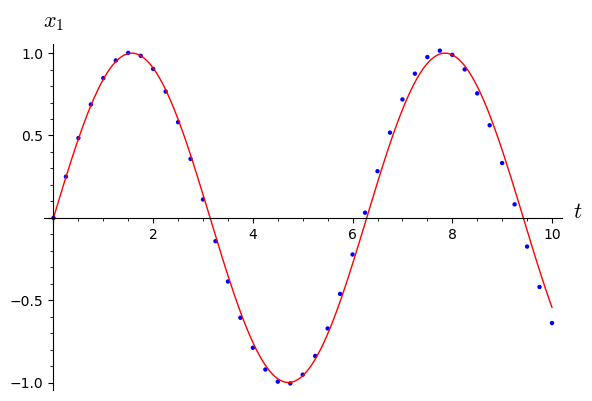

In [47]:
s2.plot(t,x1)+plot(sin,(0,10), color='red')

In [48]:
L=[erk(pr1,N=2^n, tableau=B) for n in range(12)]

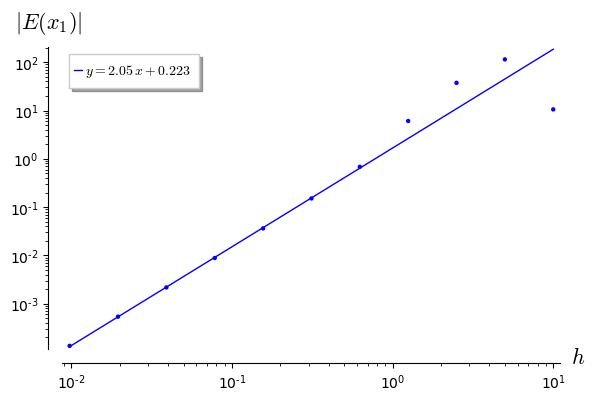

In [49]:
richardson_plot(L,x1,10, nmin=4)

In [50]:
a10=i
b1 = 1/2/a10
b0=1-b1
Bi=Butcher_tableau(2,[[[0,0],[a10,0]], [b0,b1]])

In [51]:
Bi.latex(field=QQbar)

\begin{array}{c|cc}
 &  & \\
i & i & \\
\hline
 & \frac{1}{2} i + 1 & -\frac{1}{2} i
\end{array}


$$\begin{array}{c|cc}
 &  & \\
i & i & \\
\hline
 & \frac{1}{2} i + 1 & -\frac{1}{2} i
\end{array}$$

In [52]:
Li=[erk(pr1,N=2^n, tableau=Bi, field=CC) for n in range(12)]

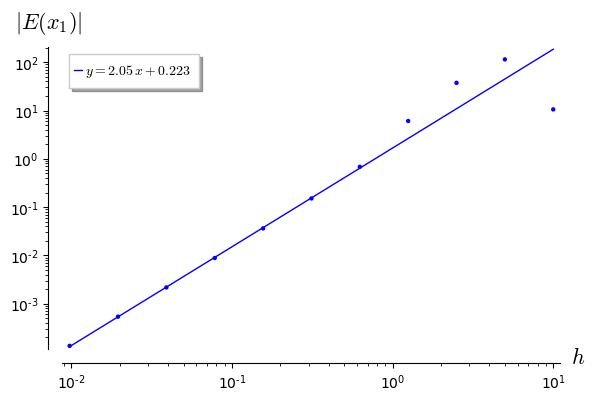

In [53]:
richardson_plot(Li,x1,10, nmin=4)

Мнимая добавка проявляется только в нелинейных задачах. Мера влияния нелинейности на  приближенное решение. 

In [54]:
var("p,q,r,t")
k=1/2
pr2=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)

In [55]:
erk(pr2, N=200, tableau=B, field=CC).list()[-1]

[10, 0.110646443410733, -0.993981036268121, 0.998488526720930]

In [56]:
erk(pr2, N=200, tableau=Bi, field=CC).list()[-1]

[10,
 0.111457845209401 - 0.000811190390574542*I,
 -0.993887908064835 - 0.0000938446416060465*I,
 0.998463284419687 + 0.0000254707261498003*I]

In [57]:
jacobi('sn',10.0, k^2)

0.114190123460750

## Неявный метод Рунге-Кутты
### Конструирование симлектических таблиц

Функция symplectic_tableau(s) возвращает все симплекстические таблицы, имеющие $s$ стадий и порядок $2s$. Корректность работы проверена до $s \leq 3$. 

In [58]:
B1=symplectic_tableau(1)
len(B1)

1

In [59]:
B1[0].latex()

\begin{array}{c|c}
\frac{1}{2} & \frac{1}{2} \\
\hline
 & 1
\end{array}


$$\begin{array}{c|c}
\frac{1}{2} & \frac{1}{2} \\
\hline
 & 1
\end{array}$$
Это --- схема средней точки.

In [60]:
B2=symplectic_tableau(2)
len(B2)

2

In [30]:
B2[0].latex()

\begin{array}{c|cc}
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$
This is the tableau for Gauss–Legendre RK method (GLRK).

In [31]:
B2[1].latex()

\begin{array}{c|cc}
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

In [32]:
B3=symplectic_tableau(3)
len(B3)

6

In [33]:
B3[0].latex()

\begin{array}{c|ccc}
-\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{5}{36} & -\frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & -\sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & \frac{5}{36} & \sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} & \frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & -\frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & \frac{2}{9} \\
\hline
 & \frac{5}{18} & \frac{5}{18} & \frac{4}{9}
\end{array}


$$\begin{array}{c|ccc}
-\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{5}{36} & -\frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & -\sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & \frac{5}{36} & \sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} & \frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & -\frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & \frac{2}{9} \\
\hline
 & \frac{5}{18} & \frac{5}{18} & \frac{4}{9}
\end{array}
$$

При перестановке наклонов $\vec k_i$ ни порядок, ни смплектичность не меняются. Поэтому система смплетических уравнений Бутчера для порядка $s$ имеет дискретную симметрию --- группу перестанновок. Не случайно, у нас получается $s!$ решений. Таблицы разные, а численное решение они дают одно и то же. 

Наблюдение С.И.Хашина:  для алгоритмов отыскания базиса Гребнера задача об отыскании коэффциентаов Бутера является трудной. 

### Пример

In [61]:
var("p,q,r,t")
k=1/2
pr2=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)

In [62]:
pr2.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{4} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{4} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right.$$

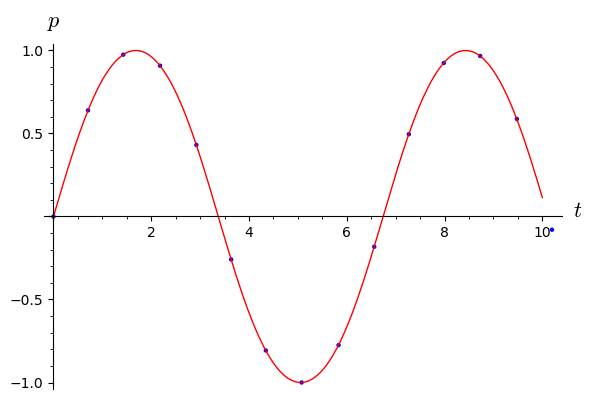

In [63]:
s=irk_adaptive(pr2, h=1, eps=10^-10, M=10^2, tableau=B2[0])
s.plot(t,p)+plot(jacobi('sn',t, k^2),(t,0,10), color='red')

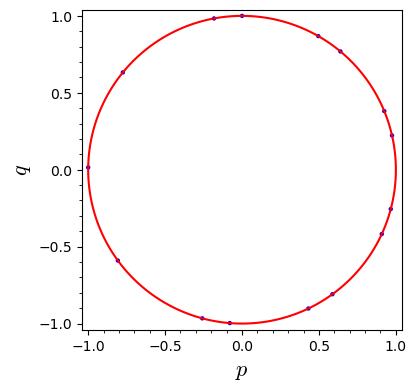

In [43]:
s.plot(p,q)+implicit_plot(p^2+q^2-1, (p,-1,1), (q,-1,1), color='red')

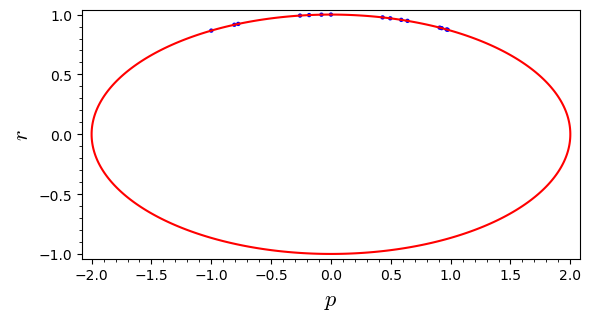

In [46]:
s.plot(p,r)+implicit_plot(k^2*p^2+r^2-1, (p,-2,2), (r,-1,1), color='red')

По теореме Купера, квадратичные интегралы сохраняются точно.

In [64]:
s.value(p^2+q^2-1,10)

2.27881489719972e-11

In [65]:
s.value(k^2*p^2+r^2-1,10)

3.63586938334493e-12

Для решения нелинейной системы уравнений на каждом шаге применяется метод простых итераций. Он сходится, если шаг достаточно мал. Поэтому мы рекомендуем использовать метод с адаптацией шага по якобиану. 

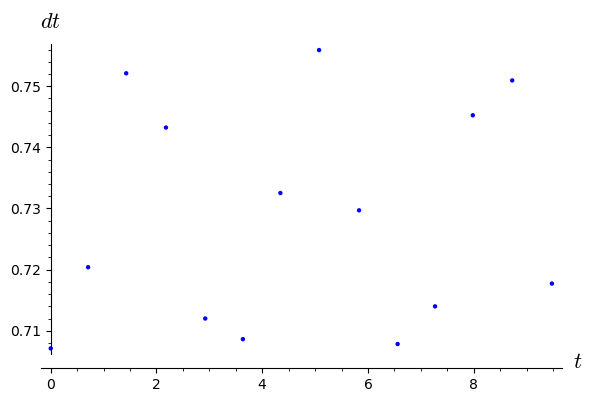

In [50]:
s.plot_dt()

In [51]:
@parallel
def fu(n):
    return irk_adaptive(pr2, h=1/2^n, eps=10^-10, M=10^2, tableau=B1[0])
L=fu([n for n in range(12)])
L1=list(L)

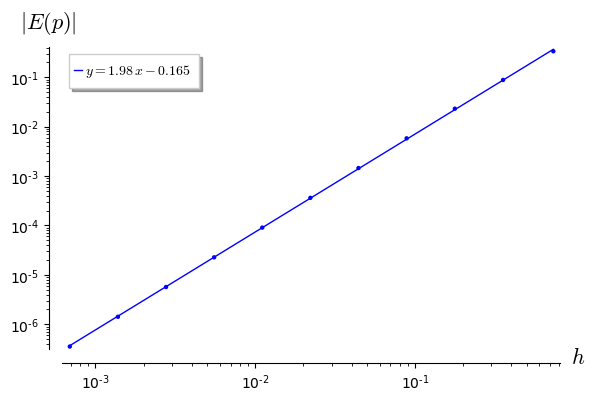

In [53]:
richardson_plot([L1[n][1] for n in range(12)],p,10, nmax=10)

In [56]:
richardson(L1[5][1],L1[4][1],p,10)

[0.114552617978052, 0.000363647001217860]

In [57]:
L1[5][1].value(p,10) - jacobi('sn',10.0, k^2)

0.000362494517302164

In [58]:
richardson(L1[5][1],L1[4][1],p^2+q^2-1,10)

[-2.82416451335976e-13, -2.39111929059638e-12]

In [59]:
richardson(L1[5][1],L1[4][1],k^2*p^2+r^2-1,10)

[-6.01740879346835e-14, 3.43263239063502e-14]

In [60]:
@parallel
def fu(n):
    return irk_adaptive(pr2, h=1/2^n, eps=10^-10, M=10^2, tableau=B2[0])
L=fu([n for n in range(12)])
L2=list(L)

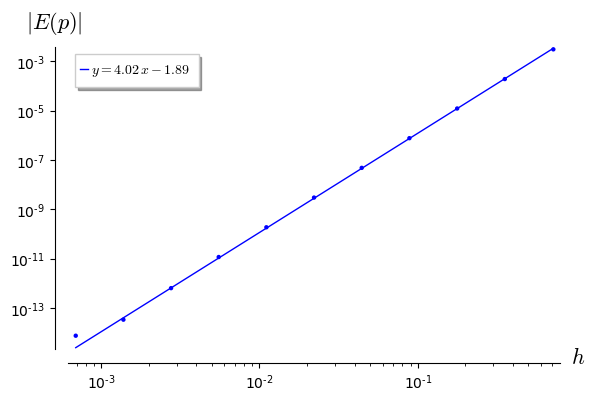

In [61]:
richardson_plot([L2[n][1] for n in range(12)],p,10, nmax=10)

In [62]:
@parallel
def fu(n):
    return irk_adaptive(pr2, h=1/2^n, eps=10^-10, M=10^2, tableau=B3[0])
L=fu([n for n in range(12)])
L3=list(L)

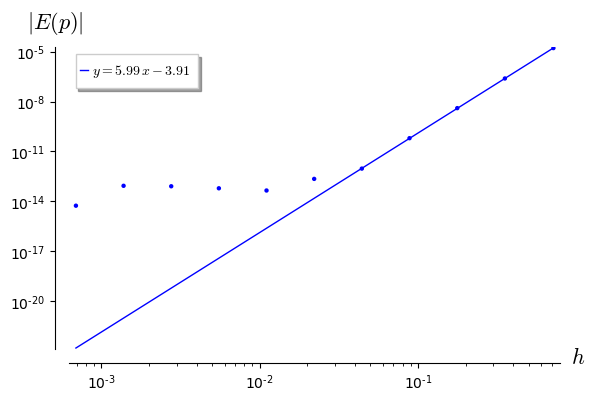

In [64]:
richardson_plot([L3[n][1] for n in range(12)],p,10, nmax=5)

##  Пример 1. Линейная гамильтонова система 
$$
H= \sum \limits_{i=1}^n \left(\frac{p_i^2}{2} + a\frac{q_i^2}{2} \right) + b \sum \limits_{ij: \, i \not = j} q_iq_j
$$
### Постановка задачи

In [67]:
n=3
a=1
b=1/10

In [68]:
var("t")
q=var(['q'+str(i) for i in range(n)])
p=var(['p'+str(i) for i in range(n)])
H=sum([i^2 for i in p])/2 + sum([b*i*j for i in q for j in q]) + sum([a*i^2 for i in q])/2

In [69]:
q0=[i^2 for i in range(n)]
p0=[0 for i in range(n)]

In [70]:
pr=Initial_problem(list(q+p),[diff(H,i) for i in p]+[-diff(H,i) for i in q],q0+p0, 100)
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} q_{0} = p_{0} , \quad \frac{d}{dt} q_{1} = p_{1} , \quad \frac{d}{dt} q_{2} = p_{2} , \quad \frac{d}{dt} p_{0} = -\frac{6}{5} \, q_{0} - \frac{1}{5} \, q_{1} - \frac{1}{5} \, q_{2} , \quad \frac{d}{dt} p_{1} = -\frac{1}{5} \, q_{0} - \frac{6}{5} \, q_{1} - \frac{1}{5} \, q_{2} , \quad  \frac{d}{dt} p_{2} = -\frac{1}{5} \, q_{0} - \frac{1}{5} \, q_{1} - \frac{6}{5} \, q_{2} , \\ &
q_{0} (0)= 0 , \quad q_{1} (0)= 1 , \quad q_{2} (0)= 4 , \quad p_{0} (0)= 0 , \quad p_{1} (0)= 0 , \quad p_{2} (0)= 0
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} q_{0} = p_{0} , \quad \frac{d}{dt} q_{1} = p_{1} , \quad \frac{d}{dt} q_{2} = p_{2} , \quad \frac{d}{dt} p_{0} = -\frac{6}{5} \, q_{0} - \frac{1}{5} \, q_{1} - \frac{1}{5} \, q_{2} , \quad \frac{d}{dt} p_{1} = -\frac{1}{5} \, q_{0} - \frac{6}{5} \, q_{1} - \frac{1}{5} \, q_{2} , \quad  \frac{d}{dt} p_{2} = -\frac{1}{5} \, q_{0} - \frac{1}{5} \, q_{1} - \frac{6}{5} \, q_{2} , \\ &
q_{0} (0)= 0 , \quad q_{1} (0)= 1 , \quad q_{2} (0)= 4 , \quad p_{0} (0)= 0 , \quad p_{1} (0)= 0 , \quad p_{2} (0)= 0
\end{aligned} \right.$$
### ERK4

In [71]:
sol=erk(pr,N=200)

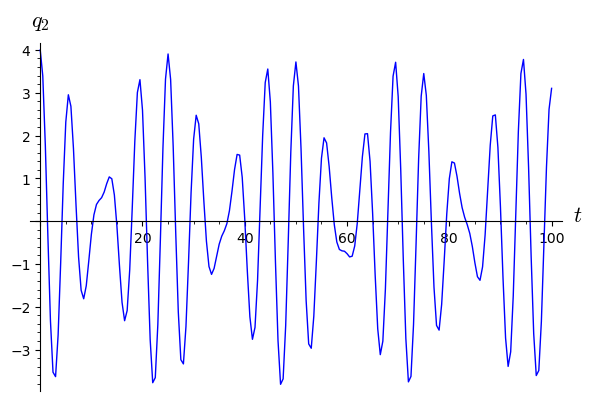

In [72]:
sol.plot(t,q[2])

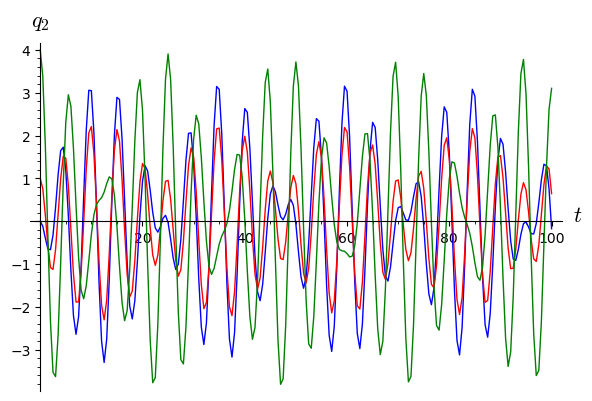

In [76]:
sol.plot(t,q[0])+sol.plot(t,q[1], color='red')+sol.plot(t,q[2], color='green', axes_labels=['$t$','$q$'])

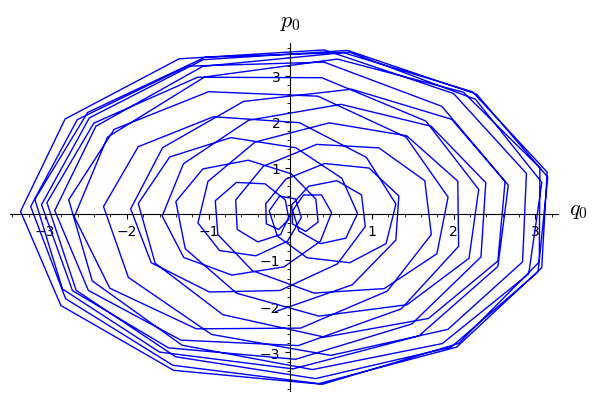

In [79]:
sol.plot(q[0], p[0])

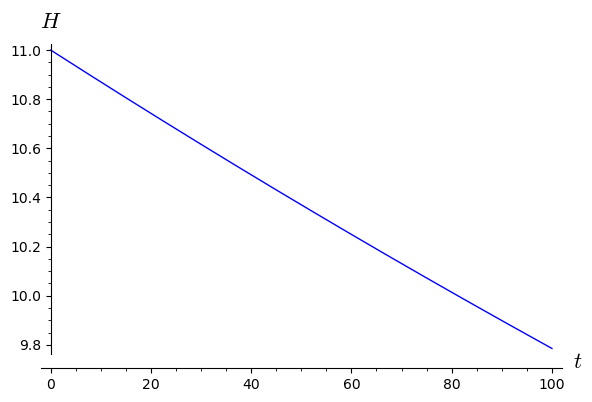

In [81]:
sol.plot(t,H, axes_labels=["$t$","$H$"])

In [82]:
solr=erk(pr,N=400)

In [84]:
richardson(sol,solr,H-11,100)

[-0.0423018115354363, -0.0781682606840534]

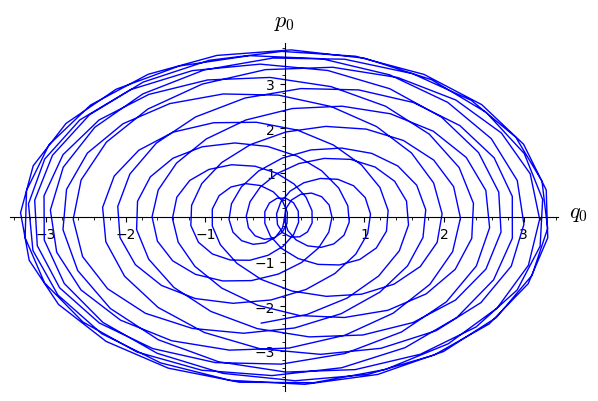

In [100]:
solr.plot(q[0], p[0])

### ERK6

In [86]:
load("butchers_list.sage")
B=butchers_list[7]
sol2=erk(pr,N=200, tableau=B)

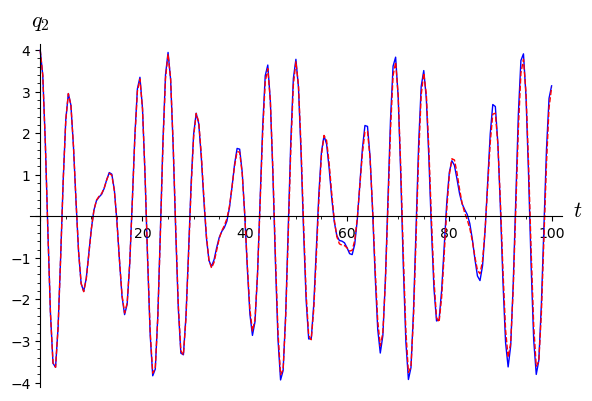

In [89]:
sol2.plot(t,q[2])+sol.plot(t,q[2], color="red", linestyle="--")

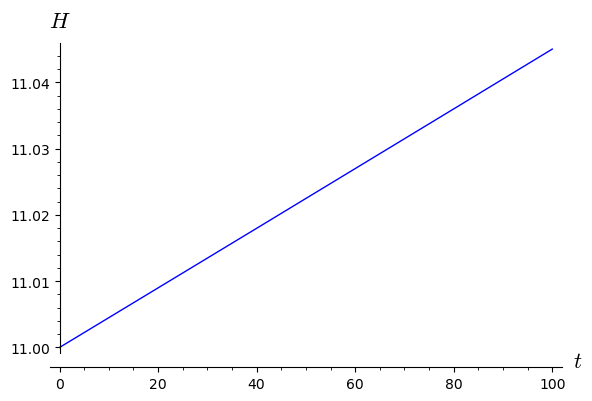

In [91]:
sol2.plot(t,H, axes_labels=["$t$","$H$"])

### IRK6

In [92]:
Bs=symplectic_tableau(3)

In [93]:
sol3=irk_adaptive(pr, h=1/2, eps=10^-10, M=10^2, tableau=Bs[0])

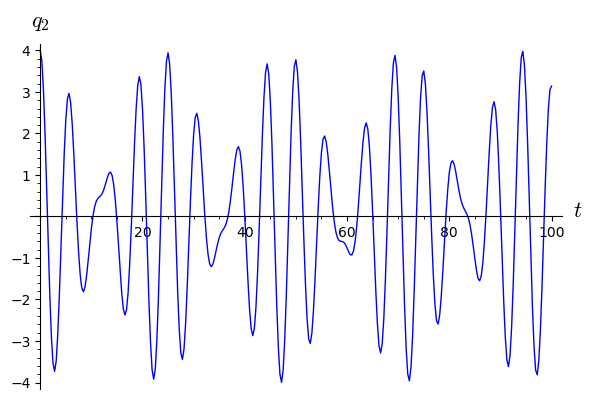

In [94]:
sol3.plot(t,q[2])

In [96]:
sol3.value(H-11,100)

-2.58587262713661e-10

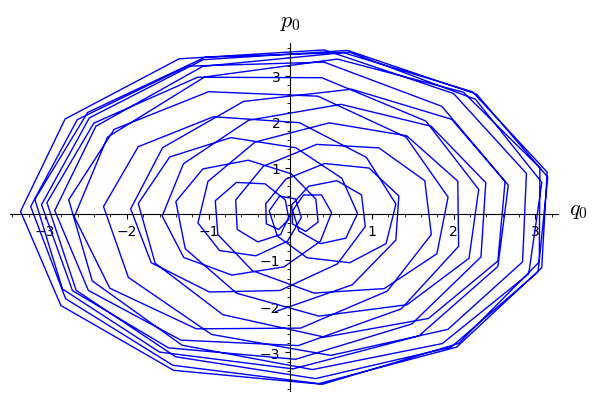

In [97]:
sol.plot(q[0], p[0])

In [101]:
sol3r=irk_adaptive(pr, h=1/4, eps=10^-10, M=10^2, tableau=Bs[0])

In [103]:
richardson(sol3,sol3r,H-11,100)

[1.51109680324168e-11, -4.34441636104885e-12]

## Пример 2. Задача 2-х тел
### IRK2 без дополнительных переменных

In [106]:
var("x1,y1,u1,v1,x2,y2,u2,v2,t")
r=sqrt((x1-x2)^2+(y1-y2)^2)
pr2=Initial_problem([x1,y1,x2,y2,u1,v1,u2,v2],[u1,v1,u2,v2,(x2-x1)/r^3, (y2-y1)/r^3, (x1-x2)/r^3, (y1-y2)/r^3],[0,0,1,0,0,0,0,1],10)

In [107]:
pr2.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} v_{1} = -\frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} u_{2} = \frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad  \frac{d}{dt} v_{2} = \frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} v_{1} = -\frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} u_{2} = \frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad  \frac{d}{dt} v_{2} = \frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1
\end{aligned} \right. $$

In [108]:
s=irk_adaptive(pr2,h=1/2, v=True)

t= 0
t= 0.125000000000000
t= 0.247024027038284
t= 0.360627720544738
t= 0.462075105227377
t= 0.549868788371773
t= 0.624376526681286
t= 0.687046187364670
t= 0.739706925892877
t= 0.784145118875827
t= 0.821918087812294
t= 0.854308601383758
t= 0.882343978667075
t= 0.906836891451037
t= 0.928428134249564
t= 0.947624000109298
t= 0.964826536721176
t= 0.980357164996676
t= 0.994474804694690
t= 1.00738969230064
t= 1.01927390736788
t= 1.03026941370086
t= 1.04049423197202
t= 1.05004720678013
t= 1.05901171306558
t= 1.06745855827942
t= 1.07544827116690
t= 1.08303291974831
t= 1.09025756553730
t= 1.09716143481437
t= 1.10377886835386
t= 1.11014009655075
t= 1.11627187607918
t= 1.12219801607416
t= 1.12793981566361
t= 1.13351642998037
t= 1.13894517818415
t= 1.14424180424651
t= 1.14942069910002
t= 1.15449509107384
t= 1.15947721022349
t= 1.16437843112703
t= 1.16920939790236
t= 1.17398013455166
t= 1.17870014322396
t= 1.18337849257738
t= 1.18802389809758
t= 1.19264479597215
t= 1.19724941191963
t= 1.201845826217

Эллипс точно не сохраняется.

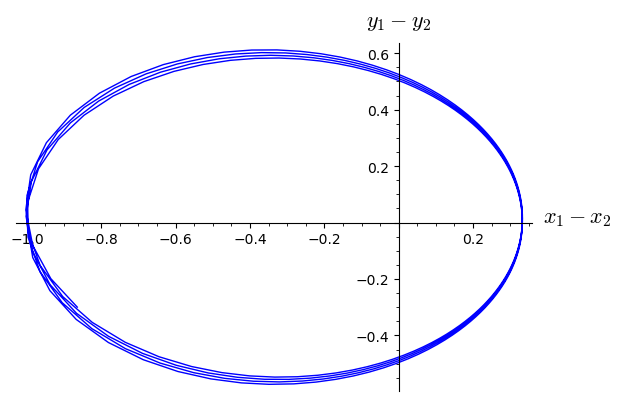

In [109]:
s.plot(x1-x2,y1-y2)

Для irk линейные и квадратичные интегралы сохраняются точно, энергия -- нет. 

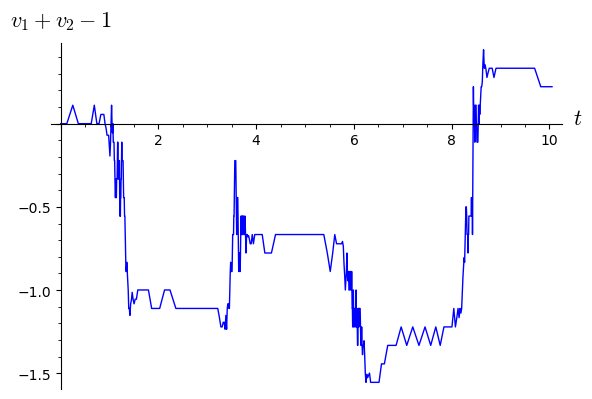

In [110]:
s.plot(t,v1+v2-1)

In [113]:
H=(u1^2+u2^2+v1^2+v2^2)/2 - 1/r

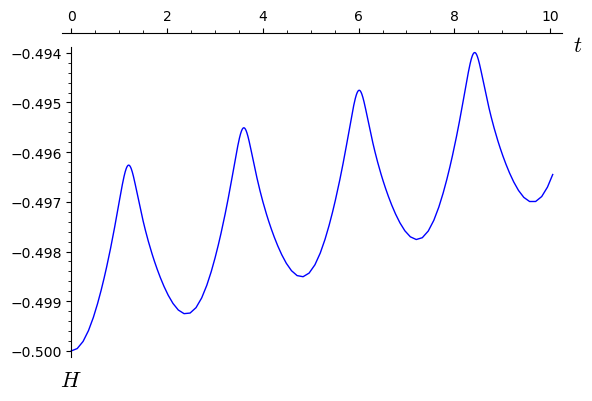

In [114]:
s.plot(t,H, axes_labels=["$t$","$H$"])

### IRK2 с дополнительными переменными
См.: Ying Y., Baddour A., Gerdt V.P., Malykh M.D., Sevastianov L.A. On the Quadratization of the Integrals for the Many-Body Problem. // Mathematics 2021, 9, 3208. doi:[10.3390/math9243208](https://doi.org/10.3390/math9243208)

In [116]:
var("x1,y1,u1,v1,x2,y2,u2,v2,r,rho,t")
pr3=Initial_problem([x1,y1,x2,y2,u1,v1,u2,v2,r,rho],[u1,v1,u2,v2,(x2-x1)*rho/r^2, (y2-y1)*rho/r^2, (x1-x2)*rho/r^2, (y1-y2)*rho/r^2,1/r*((x1-x2)*(u1-u2)+(y1-y2)*(v1-v2)), -rho/r^2*((x1-x2)*(u1-u2)+(y1-y2)*(v1-v2))],[0,0,1,0,0,0,0,1,1,1],10)

In [117]:
pr3.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{1} = -\frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} u_{2} = \frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{2} = \frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} r = \frac{{\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}}{r} , \quad  \frac{d}{dt} \rho = -\frac{{\left({\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}\right)} \rho}{r^{2}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1 , \quad r (0)= 1 , \quad \rho

$$\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{1} = -\frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} u_{2} = \frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{2} = \frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} r = \frac{{\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}}{r} , \quad  \frac{d}{dt} \rho = -\frac{{\left({\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}\right)} \rho}{r^{2}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1 , \quad r (0)= 1 , \quad \rho (0)= 1
\end{aligned} \right. $$

In [118]:
s=irk_adaptive(pr3,h=1, v=True)

t= 0
t= 0.267261241912424
t= 0.494816632193819
t= 0.653112738015592
t= 0.758166983977049
t= 0.830353607671112
t= 0.882720707416676
t= 0.922657549318864
t= 0.954398075030333
t= 0.980479865352665
t= 1.00250001644620
t= 1.02150985701545
t= 1.03822921944477
t= 1.05316806358043
t= 1.06669853782112
t= 1.07909937298733
t= 1.09058419912567
t= 1.10132017187913
t= 1.11144056206425
t= 1.12105347144750
t= 1.13024799594888
t= 1.13909866730636
t= 1.14766871139645
t= 1.15601248325301
t= 1.16417732941466
t= 1.17220506055176
t= 1.18013317378081
t= 1.18799593166771
t= 1.19582537413622
t= 1.20365230623802
t= 1.21150727267108
t= 1.21942150878607
t= 1.22742785598853
t= 1.23556164641686
t= 1.24386158812777
t= 1.25237070692539
t= 1.26113741940047
t= 1.27021682570179
t= 1.27967232593917
t= 1.28957768755898
t= 1.30001972896862
t= 1.31110184428745
t= 1.32294868527735
t= 1.33571245463741
t= 1.34958147468535
t= 1.36479201719791
t= 1.38164487947213
t= 1.40052897594121
t= 1.42195545944938
t= 1.44660787424208
t= 1.4

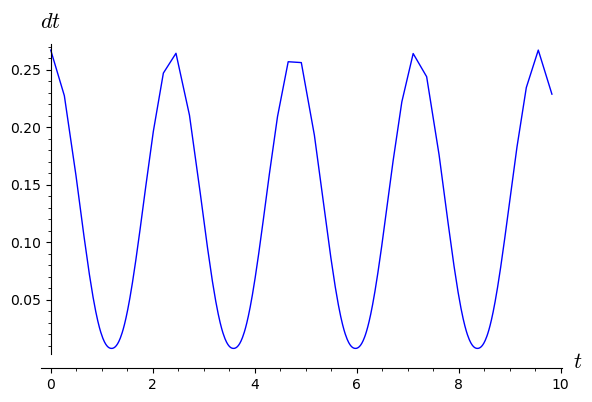

In [119]:
s.plot_dt()

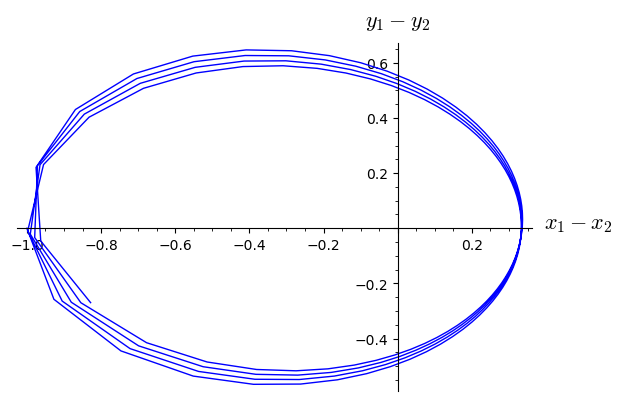

In [120]:
s.plot(x1-x2,y1-y2)

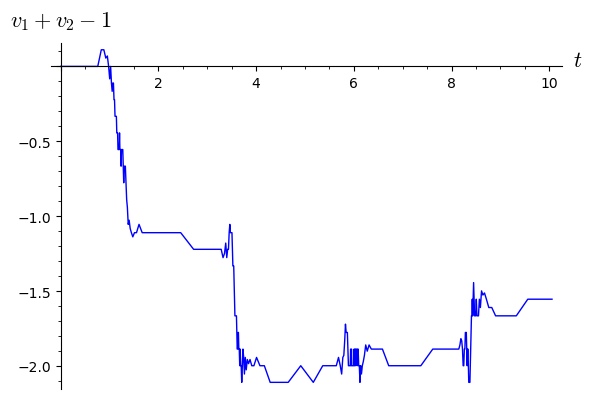

In [121]:
s.plot(t,v1+v2-1)

In [122]:
s.value(v1+v2-1,10)

-1.55431223447522e-15

In [123]:
H=(u1^2+u2^2+v1^2+v2^2)/2 - rho

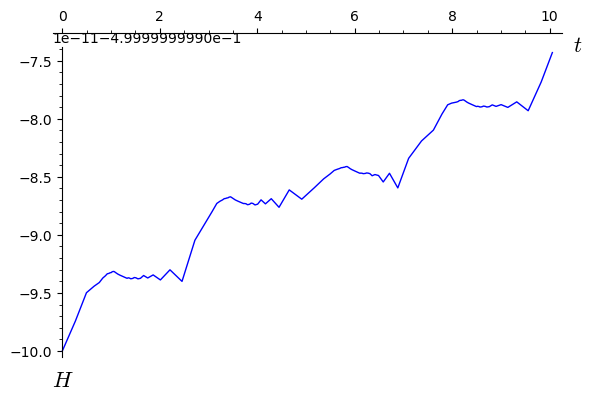

In [124]:
s.plot(t,H, axes_labels=["$t$","$H$"])

In [129]:
s.value(H+1/2,10)

2.57091010587018e-11

Все интегралы стали квадратичными и сохраняются точно, но эллипс все равно не получается. 

### IRK6

In [130]:
s3=irk_adaptive(pr3,h=1, v=True, tableau=Bs[0])

t= 0
t= 0.267261241912424
t= 0.496522339267858
t= 0.658220237109819
t= 0.766335475096430
t= 0.840672700561249
t= 0.894479523409492
t= 0.935394788940625
t= 0.967821210937157
t= 0.994399534410375
t= 1.01678968588494
t= 1.03608216587778
t= 1.05302197969859
t= 1.06813576436960
t= 1.08180703473824
t= 1.09432246934637
t= 1.10590138368830
t= 1.11671508360521
t= 1.12689992423357
t= 1.13656633637053
t= 1.14580519984806
t= 1.15469243018812
t= 1.16329233837294
t= 1.17166013716439
t= 1.17984385287468
t= 1.18788583067997
t= 1.19582397635832
t= 1.20369284445991
t= 1.21152465249329
t= 1.21935026788851
t= 1.22720018199188
t= 1.23510546242778
t= 1.24309867083288
t= 1.25121474798466
t= 1.25949189409579
t= 1.26797249744993
t= 1.27670418370111
t= 1.28574107230051
t= 1.29514534123492
t= 1.30498922316640
t= 1.31535759153169
t= 1.32635135110223
t= 1.33809193323152
t= 1.35072732583042
t= 1.36444026494038
t= 1.37945951576246
t= 1.39607563660150
t= 1.41466334804826
t= 1.43571378247557
t= 1.45988172356721
t= 1.4

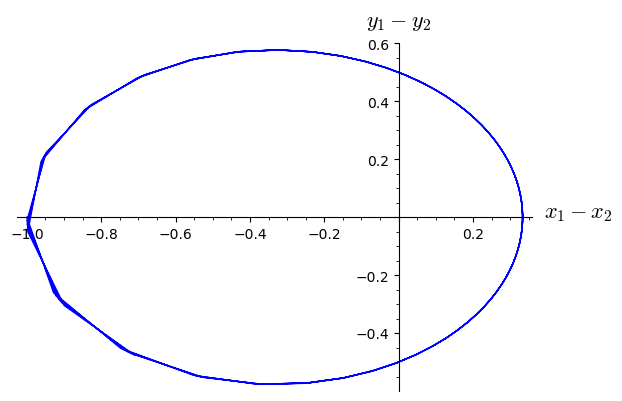

In [131]:
s3.plot(x1-x2,y1-y2)

## Метод Адамса

$$
\dot x = f(x,t), \quad x(0)=x_0
$$
Первый шаг делаем по Тейлору ($r=2$):
$$
x_1=x(\Delta t) = x_0 +f(x_0,0)\Delta t + \frac{1}{2!} D(f)(x_0,0) \Delta t^2.
$$
Следующий член дает естественную оценку точности, которую мы используем для адаптации шага. 

См.: Скарбаро, 1934. 

In [132]:
var("p,q,r,t")
k=0.99
pqr=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)

In [133]:
pqr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -0.980100000000000 \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -0.980100000000000 \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. $$

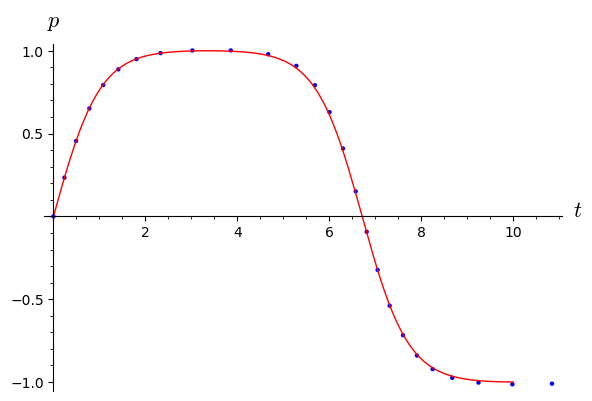

In [134]:
s=adams_adaptive(pqr, h=1/4)
s.plot(t,p)+plot(jacobi('sn', t, k^2),(t,0,10), color='red')

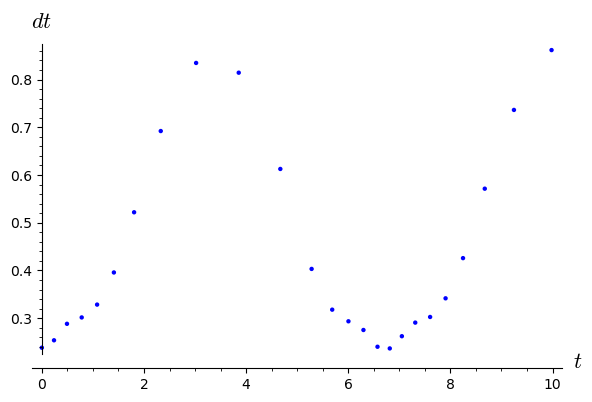

In [135]:
s.plot_dt()

Для метода Эйлера выбор шага
$$
\Delta t = ch K^{-2/5}
$$
считается оптимальным. 

См.: Белов А.А. и др. // Докл. РАН, 2016, том 466, № 3, с. 276–281

In [138]:
K=pqr.curvature().subs([p==jacobi('sn', t, k^2),q==jacobi('cn', t, k^2), r==jacobi('dn', t, k^2)])

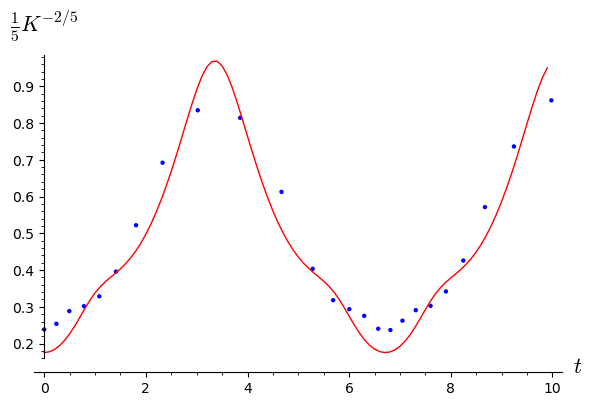

In [158]:
s.plot_dt() + line([[0.1*m,1/5*K.subs(t=0.1*m)^(-2/5)] for m in range(100)], axes_labels=['$t$','$\\frac{1}{5} K^{-2/5}$'], color='red')

In [147]:
@parallel
def fu(n):
    return adams_adaptive(pqr, h=1/2^n)
L=fu([n for n in range(10)])
L=list(L)

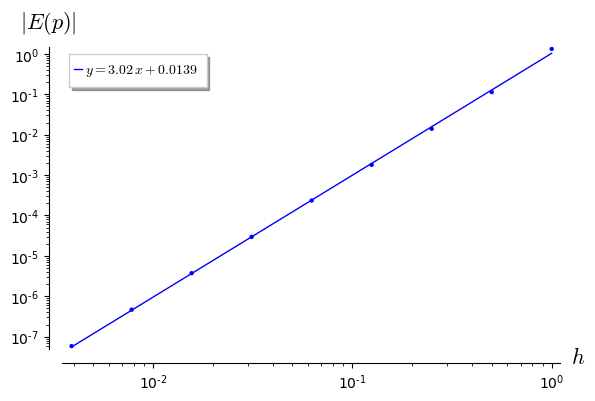

In [149]:
richardson_plot([L[n][1] for n in range(10)],p,10)

In [150]:
richardson(L[3][1],L[4][1],p,10)

[-1.00018607816928, -0.000222856987461828]

In [155]:
L[4][1].value(p,10)-jacobi('sn', 10, k^2)

-0.000234633970127129

## Определение порядка подвижной точки по методу CROS

См.: Baddour A., Malykh M.D., Panin A.A., Sevastianov L.A. Numerical determination of the singularity order of a system of differential equations // Discrete and Continuous Models and Applied Computational Science. - 2020. - Vol. 28. - N. 1. - P. 17-34. doi: [10.22363/2658-4670-2020-28-1-17-34](https://doi.org/10.22363/2658-4670-2020-28-1-17-34)

###  Пример. $\wp$-осциллятор 

In [159]:
var("y,z,t")
pr=Initial_problem([y,z], [z,4*y^2+y+2],[0,1], 2)
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} y = z , \quad  \frac{d}{dt} z = 4 \, y^{2} + y + 2 , \\ &
y (0)= 0 , \quad z (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} y = z , \quad  \frac{d}{dt} z = 4 \, y^{2} + y + 2 , \\ &
y (0)= 0 , \quad z (0)= 1
\end{aligned} \right. $$

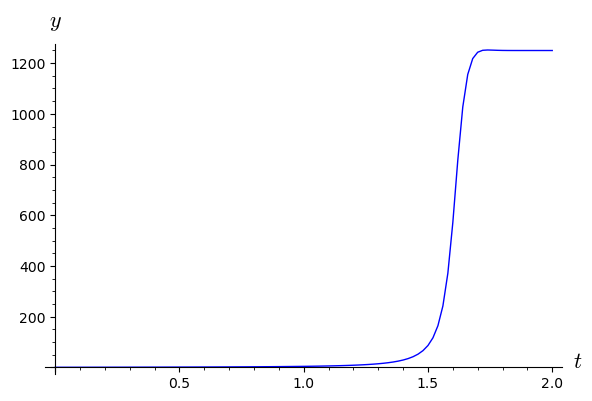

In [162]:
cros(pr, N=100).plot(t,y)

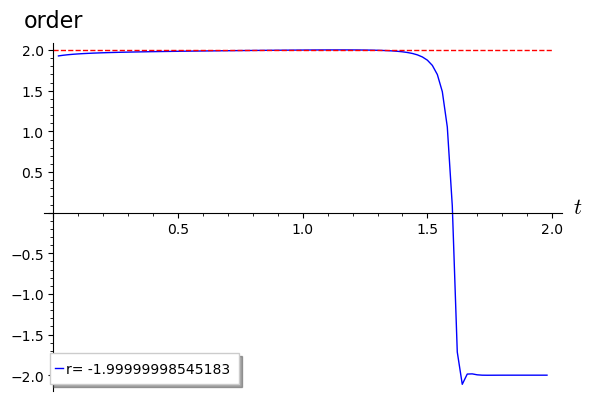

In [161]:
eff_order(pr, y, N=100)

Мы имеем полюс 2-го порядка.

## Заключение

Sage доступен для всех желающих на [www.sagemath.org](https://www.sagemath.org).

Пакет fdm доступен для всех желающих на [github.com/malykhmd/fdm](https://github.com/malykhmd/fdm). 